In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 98% !important }<style>"))

# Analysis

In [6]:
from utilities import *
from models import *

from sklearn.preprocessing import LabelEncoder
import joblib

In [7]:
pin_file = "../Data/pin.csv"

pin = read_pin(pin_file)

In [8]:
filename = "../Data/rssi4.csv"
B1 = "0117C55D14E4"

data = read_data(filename, B1)

All beacons: ['0117C55D14E4']
Selecting 0117C55D14E4


In [9]:
data[scanners] = minMaxScaling(data[scanners])

## Train Validation Test Split

In [10]:
train, validation, test = train_validation_test_split(data)

In [11]:
train.groupby("location")[scanners].count()

,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
location,,,,,,,,,,,,,,,,,
V1_11,55,71,68,96,126,82,60,105,120,49,48,130,129,27,45,20,84
V1_12,67,76,43,84,79,76,56,58,153,51,74,151,126,79,106,56,71
V1_13,60,141,47,111,42,86,101,111,229,13,33,107,80,92,150,14,63
V1_14,36,154,45,82,56,89,261,66,210,14,105,50,78,83,164,63,86
V1_20,105,92,94,77,124,98,61,82,72,31,72,90,169,15,74,23,69
V1_21,64,132,78,72,90,90,120,52,132,17,86,93,78,64,85,70,62
V1_22,61,70,58,62,68,155,205,27,233,27,136,57,49,11,109,90,51
V1_23,57,86,53,47,35,202,123,46,290,31,194,58,79,9,107,116,61
V1_24,22,67,53,55,39,108,95,47,441,17,184,54,64,33,87,135,26


In [12]:
validation.shape

(6034, 19)

In [13]:
test.shape

(6035, 19)

In [14]:
train.sort_values("time", inplace=True)
validation.sort_values("time", inplace=True)
test.sort_values("time", inplace=True)

In [15]:
train_rolled = train.groupby("location").rolling(15, min_periods=1).mean().reset_index()
validation_rolled = validation.groupby("location").rolling(15, min_periods=1).mean().reset_index()
test_rolled = test.groupby("location").rolling(15, min_periods=1).mean().reset_index()

In [16]:
train_rolled

,location,level_1,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
0,V1_11,24304,NaN,NaN,NaN,0.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,V1_11,24306,NaN,NaN,NaN,0.55,0.516667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,V1_11,24307,NaN,NaN,NaN,0.55,0.516667,NaN,0.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,V1_11,24308,NaN,0.333333,NaN,0.55,0.516667,NaN,0.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,V1_11,24310,NaN,0.333333,NaN,0.55,0.516667,0.15,0.333333,NaN,NaN,NaN,0.100000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18097,V1_32,22547,0.183333,0.283333,0.333333,NaN,NaN,0.55,0.433333,NaN,0.516667,NaN,0.700000,0.25,NaN,NaN,0.258333,NaN,NaN
18098,V1_32,22549,0.183333,0.283333,0.333333,NaN,0.233333,0.55,0.433333,NaN,0.500000,NaN,0.700000,0.25,0.3,NaN,0.258333,NaN,NaN
18099,V1_32,22551,0.183333,0.283333,0.333333,NaN,0.233333,0.55,0.433333,NaN,0.505556,NaN,0.700000,NaN,0.3,NaN,0.258333,NaN,NaN
18100,V1_32,22552,0.183333,0.283333,0.333333,NaN,0.233333,NaN,0.433333,NaN,0.505556,NaN,0.679167,NaN,0.3,NaN,0.258333,NaN,NaN


## Imputation
1. Forward fill
2. Fill NaN

In [17]:
train_imputed = train.set_index("location").groupby("location").ffill()
train_imputed.fillna(0, inplace=True)
train_imputed.reset_index(inplace=True)

In [18]:
validation_imputed = validation.set_index("location").groupby("location").ffill()
validation_imputed.fillna(0, inplace=True)
validation_imputed.reset_index(inplace=True)

In [19]:
test_imputed = test.set_index("location").groupby("location").ffill()
test_imputed.fillna(0, inplace=True)
test_imputed.reset_index(inplace=True)

## Create Label Encoding for Each Fingerprint Location

In [20]:
X_train, y_train = train_imputed[scanners].values, train_imputed["location"].values
X_validation, y_validation = validation_imputed[scanners].values, validation_imputed["location"].values
X_test, y_test = test_imputed[scanners].values, test_imputed["location"].values

In [21]:
enc = LabelEncoder()

y_train = enc.fit_transform(y_train)
y_validation = enc.transform(y_validation)
y_test = enc.transform(y_test)

In [22]:
y_train.shape

(18102,)

In [23]:
joblib.dump(enc, "../Models/MLP_Classification_Rolling_FFill_MinMax_Encoder.joblib")

['../Models/MLP_Classification_Rolling_FFill_MinMax_Encoder.joblib']

## Model Training

In [20]:
model = MLPClassifier(size='small')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                576       
_________________________________________________________________
dense_1 (Dense)              (None, 14)                462       
Total params: 1,038
Trainable params: 1,038
Non-trainable params: 0
_________________________________________________________________


In [21]:
history = model.fit(X_train, y_train, X_validation, y_validation)

Train on 18102 samples, validate on 6034 samples
Epoch 1/2000
18102/18102 [==============================] - 1s 56us/sample - loss: 2.6429 - accuracy: 0.1416 - val_loss: 2.5625 - val_accuracy: 0.2945
Epoch 2/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 2.5153 - accuracy: 0.2928 - val_loss: 2.4647 - val_accuracy: 0.4687
Epoch 3/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 2.4109 - accuracy: 0.3887 - val_loss: 2.3647 - val_accuracy: 0.2686
Epoch 4/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 2.3135 - accuracy: 0.4073 - val_loss: 2.2762 - val_accuracy: 0.3276
Epoch 5/2000
18102/18102 [==============================] - 1s 29us/sample - loss: 2.2344 - accuracy: 0.4698 - val_loss: 2.2071 - val_accuracy: 0.5161
Epoch 6/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 2.1664 - accuracy: 0.5140 - val_loss: 2.1451 - val_accuracy: 0.4030
Epoch 7/2000
18102/18102 [===================

18102/18102 [==============================] - 1s 30us/sample - loss: 1.0215 - accuracy: 0.8991 - val_loss: 1.1073 - val_accuracy: 0.8467
Epoch 55/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 1.0131 - accuracy: 0.8998 - val_loss: 1.0977 - val_accuracy: 0.8490
Epoch 56/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 1.0048 - accuracy: 0.9011 - val_loss: 1.0875 - val_accuracy: 0.8518
Epoch 57/2000
18102/18102 [==============================] - 1s 29us/sample - loss: 0.9964 - accuracy: 0.9022 - val_loss: 1.0807 - val_accuracy: 0.8500
Epoch 58/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 0.9882 - accuracy: 0.9046 - val_loss: 1.0792 - val_accuracy: 0.8437
Epoch 59/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 0.9801 - accuracy: 0.9064 - val_loss: 1.0696 - val_accuracy: 0.8595
Epoch 60/2000
18102/18102 [==============================] - 1s 29us/sample - loss: 0.9731 - accuracy:

Epoch 108/2000
18102/18102 [==============================] - 1s 29us/sample - loss: 0.7352 - accuracy: 0.9377 - val_loss: 0.8510 - val_accuracy: 0.8792
Epoch 109/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 0.7320 - accuracy: 0.9382 - val_loss: 0.8500 - val_accuracy: 0.8837
Epoch 110/2000
18102/18102 [==============================] - 1s 29us/sample - loss: 0.7284 - accuracy: 0.9396 - val_loss: 0.8485 - val_accuracy: 0.8949
Epoch 111/2000
18102/18102 [==============================] - 1s 29us/sample - loss: 0.7254 - accuracy: 0.9385 - val_loss: 0.8484 - val_accuracy: 0.8767
Epoch 112/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 0.7223 - accuracy: 0.9381 - val_loss: 0.8414 - val_accuracy: 0.8908
Epoch 113/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 0.7193 - accuracy: 0.9390 - val_loss: 0.8392 - val_accuracy: 0.8840
Epoch 114/2000
18102/18102 [==============================] - 1s 29us/sample - los

18102/18102 [==============================] - 1s 29us/sample - loss: 0.6124 - accuracy: 0.9461 - val_loss: 0.7519 - val_accuracy: 0.8971
Epoch 162/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 0.6107 - accuracy: 0.9470 - val_loss: 0.7493 - val_accuracy: 0.8939
Epoch 163/2000
18102/18102 [==============================] - 1s 29us/sample - loss: 0.6088 - accuracy: 0.9462 - val_loss: 0.7460 - val_accuracy: 0.9040
Epoch 164/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 0.6070 - accuracy: 0.9475 - val_loss: 0.7450 - val_accuracy: 0.9019
Epoch 165/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 0.6056 - accuracy: 0.9486 - val_loss: 0.7440 - val_accuracy: 0.8987
Epoch 166/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 0.6038 - accuracy: 0.9457 - val_loss: 0.7445 - val_accuracy: 0.8941
Epoch 167/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 0.6023 - acc

18102/18102 [==============================] - 1s 30us/sample - loss: 0.5405 - accuracy: 0.9515 - val_loss: 0.6896 - val_accuracy: 0.9052
Epoch 215/2000
18102/18102 [==============================] - 1s 29us/sample - loss: 0.5394 - accuracy: 0.9525 - val_loss: 0.6913 - val_accuracy: 0.9049
Epoch 216/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 0.5388 - accuracy: 0.9512 - val_loss: 0.6843 - val_accuracy: 0.9092
Epoch 217/2000
18102/18102 [==============================] - 1s 29us/sample - loss: 0.5374 - accuracy: 0.9507 - val_loss: 0.6859 - val_accuracy: 0.9065
Epoch 218/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 0.5365 - accuracy: 0.9519 - val_loss: 0.6811 - val_accuracy: 0.9069
Epoch 219/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 0.5354 - accuracy: 0.9507 - val_loss: 0.6815 - val_accuracy: 0.9044
Epoch 220/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 0.5343 - acc

18102/18102 [==============================] - 1s 29us/sample - loss: 0.4921 - accuracy: 0.9543 - val_loss: 0.6463 - val_accuracy: 0.9108
Epoch 268/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 0.4913 - accuracy: 0.9551 - val_loss: 0.6474 - val_accuracy: 0.9085
Epoch 269/2000
18102/18102 [==============================] - 1s 29us/sample - loss: 0.4908 - accuracy: 0.9534 - val_loss: 0.6467 - val_accuracy: 0.9120
Epoch 270/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 0.4898 - accuracy: 0.9544 - val_loss: 0.6468 - val_accuracy: 0.9097
Epoch 271/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 0.4889 - accuracy: 0.9546 - val_loss: 0.6541 - val_accuracy: 0.8999
Epoch 272/2000
18102/18102 [==============================] - 1s 29us/sample - loss: 0.4883 - accuracy: 0.9538 - val_loss: 0.6495 - val_accuracy: 0.9112
Epoch 273/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 0.4874 - acc

18102/18102 [==============================] - 1s 29us/sample - loss: 0.4564 - accuracy: 0.9556 - val_loss: 0.6162 - val_accuracy: 0.9160
Epoch 321/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 0.4559 - accuracy: 0.9569 - val_loss: 0.6180 - val_accuracy: 0.9077
Epoch 322/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 0.4553 - accuracy: 0.9553 - val_loss: 0.6147 - val_accuracy: 0.9108
Epoch 323/2000
18102/18102 [==============================] - 1s 29us/sample - loss: 0.4546 - accuracy: 0.9571 - val_loss: 0.6195 - val_accuracy: 0.9107
Epoch 324/2000
18102/18102 [==============================] - 1s 29us/sample - loss: 0.4541 - accuracy: 0.9578 - val_loss: 0.6223 - val_accuracy: 0.9105
Epoch 325/2000
18102/18102 [==============================] - 1s 29us/sample - loss: 0.4536 - accuracy: 0.9578 - val_loss: 0.6222 - val_accuracy: 0.9165
Epoch 326/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 0.4529 - acc

18102/18102 [==============================] - 1s 30us/sample - loss: 0.4285 - accuracy: 0.9570 - val_loss: 0.5991 - val_accuracy: 0.9108
Epoch 374/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 0.4282 - accuracy: 0.9580 - val_loss: 0.6078 - val_accuracy: 0.9002
Epoch 375/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 0.4281 - accuracy: 0.9595 - val_loss: 0.5947 - val_accuracy: 0.9120
Epoch 376/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 0.4278 - accuracy: 0.9586 - val_loss: 0.5951 - val_accuracy: 0.9156
Epoch 377/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 0.4266 - accuracy: 0.9575 - val_loss: 0.6007 - val_accuracy: 0.9087
Epoch 378/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 0.4262 - accuracy: 0.9582 - val_loss: 0.6055 - val_accuracy: 0.9059
Epoch 379/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 0.4261 - acc

18102/18102 [==============================] - 1s 30us/sample - loss: 0.4067 - accuracy: 0.9604 - val_loss: 0.5851 - val_accuracy: 0.9171
Epoch 427/2000
18102/18102 [==============================] - 1s 29us/sample - loss: 0.4061 - accuracy: 0.9607 - val_loss: 0.5796 - val_accuracy: 0.9155
Epoch 428/2000
18102/18102 [==============================] - 1s 29us/sample - loss: 0.4055 - accuracy: 0.9608 - val_loss: 0.5825 - val_accuracy: 0.9148
Epoch 429/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 0.4049 - accuracy: 0.9604 - val_loss: 0.5781 - val_accuracy: 0.9173
Epoch 430/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 0.4049 - accuracy: 0.9597 - val_loss: 0.5879 - val_accuracy: 0.9062
Epoch 431/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 0.4045 - accuracy: 0.9609 - val_loss: 0.5824 - val_accuracy: 0.9084
Epoch 432/2000
18102/18102 [==============================] - 1s 29us/sample - loss: 0.4046 - acc

18102/18102 [==============================] - 1s 30us/sample - loss: 0.3882 - accuracy: 0.9620 - val_loss: 0.5692 - val_accuracy: 0.9183
Epoch 480/2000
18102/18102 [==============================] - 1s 31us/sample - loss: 0.3880 - accuracy: 0.9620 - val_loss: 0.5697 - val_accuracy: 0.9165
Epoch 481/2000
18102/18102 [==============================] - 1s 29us/sample - loss: 0.3877 - accuracy: 0.9623 - val_loss: 0.5639 - val_accuracy: 0.9176
Epoch 482/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 0.3872 - accuracy: 0.9624 - val_loss: 0.5649 - val_accuracy: 0.9175
Epoch 483/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 0.3869 - accuracy: 0.9617 - val_loss: 0.5693 - val_accuracy: 0.9181
Epoch 484/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 0.3869 - accuracy: 0.9618 - val_loss: 0.5725 - val_accuracy: 0.9148
Epoch 485/2000
18102/18102 [==============================] - 1s 29us/sample - loss: 0.3864 - acc

18102/18102 [==============================] - 1s 30us/sample - loss: 0.3732 - accuracy: 0.9635 - val_loss: 0.5580 - val_accuracy: 0.9168
Epoch 533/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 0.3726 - accuracy: 0.9638 - val_loss: 0.5585 - val_accuracy: 0.9201
Epoch 534/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 0.3722 - accuracy: 0.9630 - val_loss: 0.5756 - val_accuracy: 0.9017
Epoch 535/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 0.3720 - accuracy: 0.9630 - val_loss: 0.5589 - val_accuracy: 0.9110
Epoch 536/2000
18102/18102 [==============================] - 1s 29us/sample - loss: 0.3717 - accuracy: 0.9633 - val_loss: 0.5533 - val_accuracy: 0.9201
Epoch 537/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 0.3715 - accuracy: 0.9635 - val_loss: 0.5673 - val_accuracy: 0.9069
Epoch 538/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 0.3710 - acc

18102/18102 [==============================] - 1s 30us/sample - loss: 0.3592 - accuracy: 0.9656 - val_loss: 0.5460 - val_accuracy: 0.9195
Epoch 586/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 0.3593 - accuracy: 0.9639 - val_loss: 0.5468 - val_accuracy: 0.9198
Epoch 587/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 0.3592 - accuracy: 0.9645 - val_loss: 0.5494 - val_accuracy: 0.9201
Epoch 588/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 0.3589 - accuracy: 0.9642 - val_loss: 0.5467 - val_accuracy: 0.9228
Epoch 589/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 0.3585 - accuracy: 0.9646 - val_loss: 0.5514 - val_accuracy: 0.9143
Epoch 590/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 0.3582 - accuracy: 0.9645 - val_loss: 0.5475 - val_accuracy: 0.9168
Epoch 591/2000
18102/18102 [==============================] - 1s 29us/sample - loss: 0.3581 - acc

18102/18102 [==============================] - 1s 30us/sample - loss: 0.3474 - accuracy: 0.9644 - val_loss: 0.5393 - val_accuracy: 0.9185
Epoch 639/2000
18102/18102 [==============================] - 1s 29us/sample - loss: 0.3477 - accuracy: 0.9654 - val_loss: 0.5417 - val_accuracy: 0.9132
Epoch 640/2000
18102/18102 [==============================] - 1s 29us/sample - loss: 0.3477 - accuracy: 0.9649 - val_loss: 0.5358 - val_accuracy: 0.9211
Epoch 641/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 0.3474 - accuracy: 0.9654 - val_loss: 0.5407 - val_accuracy: 0.9143
Epoch 642/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 0.3467 - accuracy: 0.9650 - val_loss: 0.5360 - val_accuracy: 0.9214
Epoch 643/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 0.3469 - accuracy: 0.9652 - val_loss: 0.5395 - val_accuracy: 0.9233
Epoch 644/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 0.3470 - acc

18102/18102 [==============================] - 1s 29us/sample - loss: 0.3373 - accuracy: 0.9655 - val_loss: 0.5365 - val_accuracy: 0.9203
Epoch 692/2000
18102/18102 [==============================] - 1s 29us/sample - loss: 0.3377 - accuracy: 0.9655 - val_loss: 0.5385 - val_accuracy: 0.9213
Epoch 693/2000
18102/18102 [==============================] - 1s 29us/sample - loss: 0.3374 - accuracy: 0.9655 - val_loss: 0.5302 - val_accuracy: 0.9251
Epoch 694/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 0.3372 - accuracy: 0.9666 - val_loss: 0.5489 - val_accuracy: 0.9085
Epoch 695/2000
18102/18102 [==============================] - 1s 29us/sample - loss: 0.3367 - accuracy: 0.9653 - val_loss: 0.5544 - val_accuracy: 0.9037
Epoch 696/2000
18102/18102 [==============================] - 1s 29us/sample - loss: 0.3371 - accuracy: 0.9661 - val_loss: 0.5314 - val_accuracy: 0.9223
Epoch 697/2000
18102/18102 [==============================] - 1s 29us/sample - loss: 0.3365 - acc

18102/18102 [==============================] - 1s 29us/sample - loss: 0.3288 - accuracy: 0.9663 - val_loss: 0.5346 - val_accuracy: 0.9176
Epoch 745/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 0.3285 - accuracy: 0.9660 - val_loss: 0.5272 - val_accuracy: 0.9226
Epoch 746/2000
18102/18102 [==============================] - 1s 29us/sample - loss: 0.3289 - accuracy: 0.9662 - val_loss: 0.5286 - val_accuracy: 0.9251
Epoch 747/2000
18102/18102 [==============================] - 1s 29us/sample - loss: 0.3283 - accuracy: 0.9661 - val_loss: 0.5259 - val_accuracy: 0.9213
Epoch 748/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 0.3279 - accuracy: 0.9670 - val_loss: 0.5393 - val_accuracy: 0.9166
Epoch 749/2000
18102/18102 [==============================] - 1s 29us/sample - loss: 0.3278 - accuracy: 0.9665 - val_loss: 0.5255 - val_accuracy: 0.9277
Epoch 750/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 0.3276 - acc

18102/18102 [==============================] - 1s 30us/sample - loss: 0.3206 - accuracy: 0.9668 - val_loss: 0.5294 - val_accuracy: 0.9198
Epoch 798/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 0.3205 - accuracy: 0.9669 - val_loss: 0.5207 - val_accuracy: 0.9211
Epoch 799/2000
18102/18102 [==============================] - 1s 34us/sample - loss: 0.3207 - accuracy: 0.9667 - val_loss: 0.5183 - val_accuracy: 0.9256
Epoch 800/2000
18102/18102 [==============================] - 1s 31us/sample - loss: 0.3201 - accuracy: 0.9664 - val_loss: 0.5152 - val_accuracy: 0.9282
Epoch 801/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 0.3197 - accuracy: 0.9661 - val_loss: 0.5285 - val_accuracy: 0.9166
Epoch 802/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 0.3201 - accuracy: 0.9664 - val_loss: 0.5220 - val_accuracy: 0.9173
Epoch 803/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 0.3197 - acc

18102/18102 [==============================] - 1s 29us/sample - loss: 0.3127 - accuracy: 0.9662 - val_loss: 0.5245 - val_accuracy: 0.9161
Epoch 851/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 0.3134 - accuracy: 0.9669 - val_loss: 0.5154 - val_accuracy: 0.9229
Epoch 852/2000
18102/18102 [==============================] - 1s 29us/sample - loss: 0.3128 - accuracy: 0.9665 - val_loss: 0.5189 - val_accuracy: 0.9185
Epoch 853/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 0.3131 - accuracy: 0.9667 - val_loss: 0.5218 - val_accuracy: 0.9176
Epoch 854/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 0.3125 - accuracy: 0.9678 - val_loss: 0.5203 - val_accuracy: 0.9191
Epoch 855/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 0.3129 - accuracy: 0.9675 - val_loss: 0.5192 - val_accuracy: 0.9165
Epoch 856/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 0.3126 - acc

18102/18102 [==============================] - 1s 30us/sample - loss: 0.3066 - accuracy: 0.9671 - val_loss: 0.5139 - val_accuracy: 0.9196
Epoch 904/2000
18102/18102 [==============================] - 1s 29us/sample - loss: 0.3067 - accuracy: 0.9678 - val_loss: 0.5120 - val_accuracy: 0.9226
Epoch 905/2000
18102/18102 [==============================] - 1s 29us/sample - loss: 0.3062 - accuracy: 0.9676 - val_loss: 0.5144 - val_accuracy: 0.9216
Epoch 906/2000
18102/18102 [==============================] - 1s 29us/sample - loss: 0.3061 - accuracy: 0.9683 - val_loss: 0.5145 - val_accuracy: 0.9198
Epoch 907/2000
18102/18102 [==============================] - 1s 29us/sample - loss: 0.3061 - accuracy: 0.9674 - val_loss: 0.5080 - val_accuracy: 0.9301
Epoch 908/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 0.3064 - accuracy: 0.9669 - val_loss: 0.5153 - val_accuracy: 0.9191
Epoch 909/2000
18102/18102 [==============================] - 1s 29us/sample - loss: 0.3058 - acc

18102/18102 [==============================] - 1s 29us/sample - loss: 0.3006 - accuracy: 0.9682 - val_loss: 0.5150 - val_accuracy: 0.9205
Epoch 957/2000
18102/18102 [==============================] - 1s 29us/sample - loss: 0.3003 - accuracy: 0.9675 - val_loss: 0.5115 - val_accuracy: 0.9214
Epoch 958/2000
18102/18102 [==============================] - 1s 29us/sample - loss: 0.3006 - accuracy: 0.9691 - val_loss: 0.5164 - val_accuracy: 0.9180
Epoch 959/2000
18102/18102 [==============================] - 1s 29us/sample - loss: 0.3003 - accuracy: 0.9686 - val_loss: 0.5120 - val_accuracy: 0.9180
Epoch 960/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 0.3004 - accuracy: 0.9679 - val_loss: 0.5244 - val_accuracy: 0.9087
Epoch 961/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 0.3004 - accuracy: 0.9673 - val_loss: 0.5084 - val_accuracy: 0.9224
Epoch 962/2000
18102/18102 [==============================] - 1s 30us/sample - loss: 0.2998 - acc

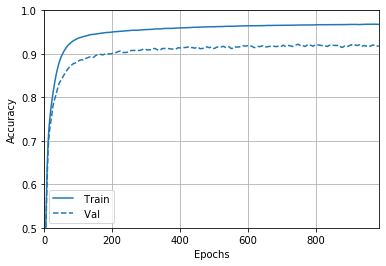

In [22]:
model.show_history()

## Model Validation

In [23]:
model.model_validation(X_validation, y_validation)

6034/1 - 0s - loss: 0.3598 - accuracy: 0.9115
Validation loss: 0.51893139340386
Accuracy: 0.91150147


In [24]:
pred = np.argmax(model.predict(X_validation), axis=1)

In [25]:
df = pd.DataFrame(data=X_validation, columns=scanners)

In [26]:
df["RealLoc"] = enc.inverse_transform(y_validation)
df["PredLoc"] = enc.inverse_transform(pred)

In [27]:
df_correct = df[df["RealLoc"] == df["PredLoc"]]
df_wrong = df[df["RealLoc"] != df["PredLoc"]]

In [28]:
df_wrong.groupby("RealLoc")["RealLoc"].count()

RealLoc
V1_11     14
V1_12     29
V1_13     16
V1_14      8
V1_20     27
V1_21     99
V1_22     53
V1_23    130
V1_24      1
V1_28      9
V1_29     37
V1_30     22
V1_31     37
V1_32     52
Name: RealLoc, dtype: int64

In [29]:
df_wrong[df_wrong["RealLoc"] == "V1_21"].groupby("PredLoc")["PredLoc"].count()

PredLoc
V1_11    19
V1_12     1
V1_13    15
V1_29    60
V1_31     4
Name: PredLoc, dtype: int64

In [30]:
df_wrong[df_wrong["RealLoc"] == "V1_22"].groupby("PredLoc")["PredLoc"].count()

PredLoc
V1_13     1
V1_14     2
V1_23     5
V1_30    37
V1_31     8
Name: PredLoc, dtype: int64

In [31]:
df_wrong[df_wrong["RealLoc"] == "V1_23"].groupby("PredLoc")["PredLoc"].count()

PredLoc
V1_13    21
V1_22    34
V1_24     1
V1_29     3
V1_31    13
V1_32    58
Name: PredLoc, dtype: int64

In [32]:
df_wrong[df_wrong["RealLoc"] == "V1_32"].groupby("PredLoc")["PredLoc"].count()

PredLoc
V1_22    37
V1_23     7
V1_31     8
Name: PredLoc, dtype: int64

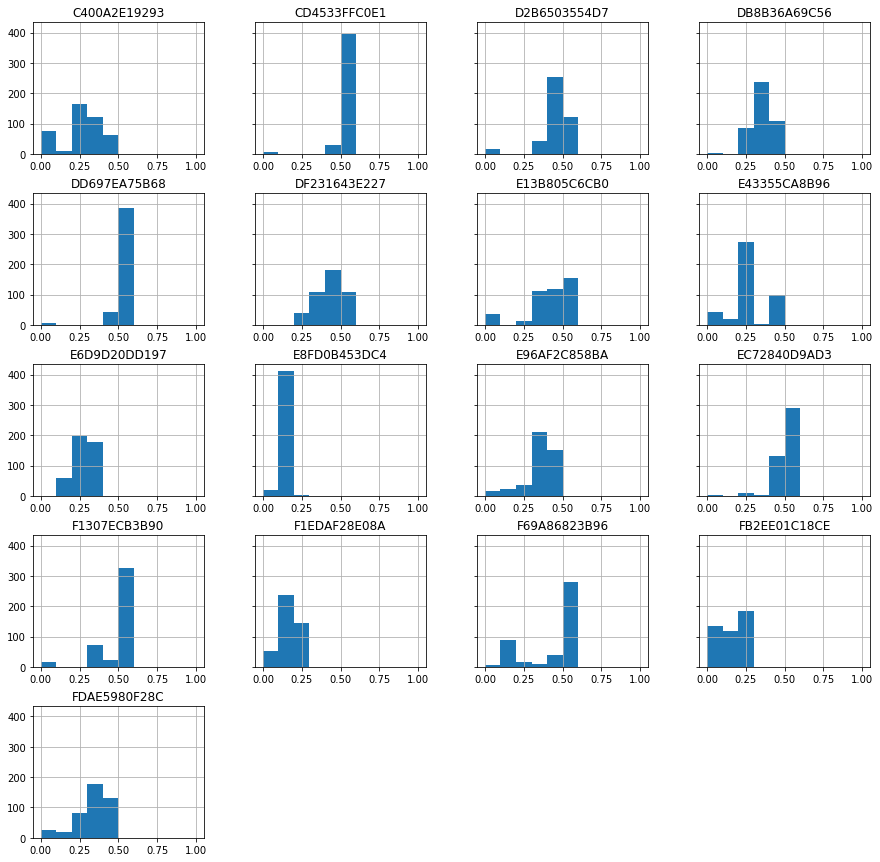

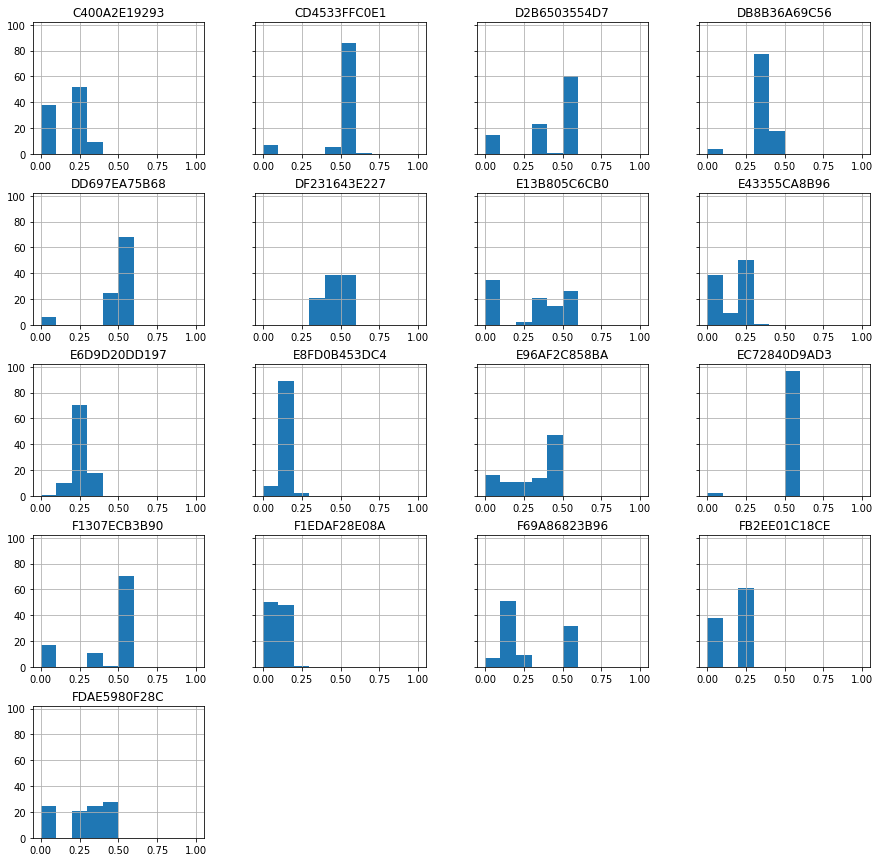

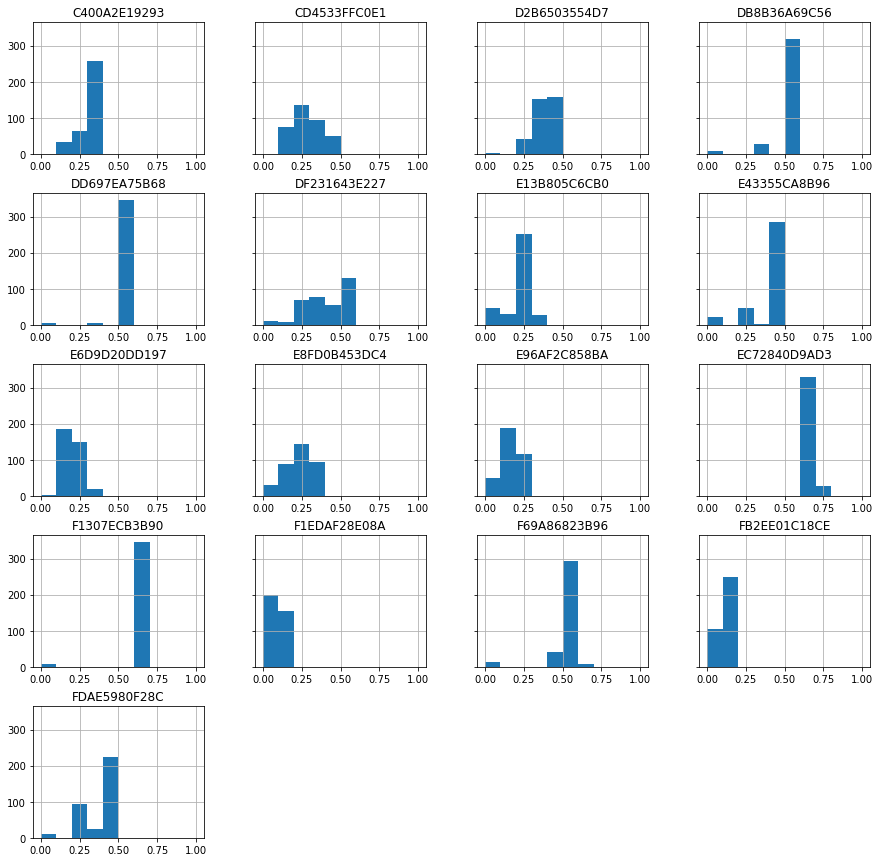

In [33]:
df[df["RealLoc"] == "V1_21"].hist(figsize=(15,15), range=[0, 1], sharey=True)
df_wrong[df_wrong["RealLoc"] == "V1_21"].hist(figsize=(15,15), range=[0, 1], sharey=True)
df[df["RealLoc"] == "V1_11"].hist(figsize=(15,15), range=[0, 1], sharey=True)
plt.show()

## Model Testing

In [34]:
model.model_testing(X_test, y_test)

6035/1 - 0s - loss: 0.3376 - accuracy: 0.9056
Test loss: 0.5628879862574377
Accuracy 0.90555096


## Plotting Learning Curves

train_loss = []
val_loss = []

for f in range(1, 11, 1):
    frac = f / 10.0
    sample = data.sample(frac=frac, random_state=12345)
    train, validation, test = train_validation_test_split(sample)

    train.sort_values("time", inplace=True)
    validation.sort_values("time", inplace=True)
    test.sort_values("time", inplace=True)

    train_rolled = train.groupby("location").rolling(15, min_periods=1).mean().reset_index()
    validation_rolled = validation.groupby("location").rolling(15, min_periods=1).mean().reset_index()
    test_rolled = test.groupby("location").rolling(15, min_periods=1).mean().reset_index()

    train_imputed = train.set_index("location").groupby("location").ffill()
    train_imputed.fillna(0, inplace=True)
    train_imputed.reset_index(inplace=True)

    validation_imputed = validation.set_index("location").groupby("location").ffill()
    validation_imputed.fillna(0, inplace=True)
    validation_imputed.reset_index(inplace=True)

    test_imputed = test.set_index("location").groupby("location").ffill()
    test_imputed.fillna(0, inplace=True)
    test_imputed.reset_index(inplace=True)

    X_train, y_train = train_imputed[scanners].values, train_imputed["location"].values
    X_validation, y_validation = validation_imputed[scanners].values, validation_imputed["location"].values
    X_test, y_test = test_imputed[scanners].values, test_imputed["location"].values

    enc = LabelEncoder()
    y_train = enc.fit_transform(y_train)
    y_validation = enc.transform(y_validation)
    y_test = enc.transform(y_test)

    model = MLPClassifier(size='small')
    history = model.fit(X_train, y_train, X_validation, y_validation)

    train_loss.append(history.history['loss'][-1])
    val_loss.append(history.history['val_loss'][-1])

x = np.arange(0.1, 1.1, 0.1)
plt.plot(x, train_loss, label='Training loss')
plt.plot(x, val_loss, label='Validation loss')
plt.legend()
plt.xlabel("Dataset size")
plt.ylabel("Loss")
plt.show()

model.save('../Models/MLP_Classification_Rolling_FFill_MinMax.h5')